In [22]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("Telco-Customer-Churn (1).csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:>

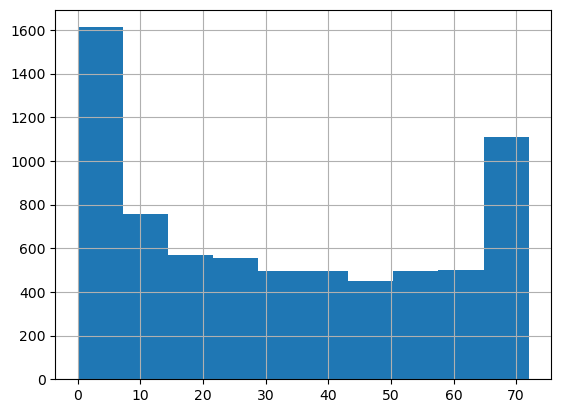

In [17]:
df["tenure"].hist()

In [18]:
# Linear Normalization
def min_max_normalize(datalist):
    return (datalist - datalist.min()) / (datalist.max() - datalist.min())

normalized = min_max_normalize(df['tenure'])

<AxesSubplot:>

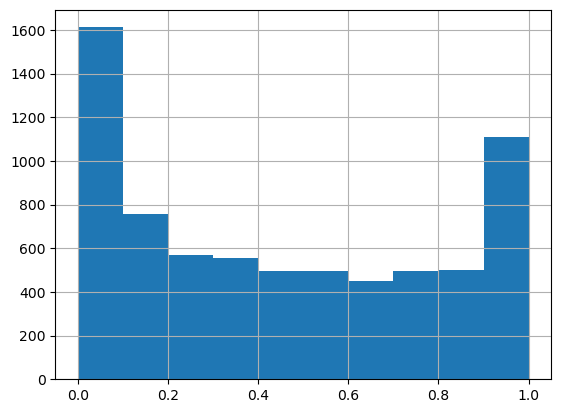

In [21]:
normalized.hist()

In [23]:
# Standard scaling Normalization
def scaling(datalist):
    return (datalist - datalist.mean()) / np.std(datalist)

normalized = scaling(df['tenure'])

In [27]:
df["tenure"]

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [29]:
# categorical data to numeric
df["Partner"]

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object

In [30]:
#method with less variables
df['Partner'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)

In [31]:
df["Partner"]

0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7043, dtype: int64

In [33]:
#method with more variables
# get the dummies and store it in a variable
dummies = pd.get_dummies(df.InternetService)
 
# Concatenate the dummies to original dataframe
merged = pd.concat([df, dummies], axis='columns')
 
# drop the values
merged.drop(['InternetService'], axis='columns')
 
# print the dataframe
print(merged)

      customerID  gender  SeniorCitizen  Partner Dependents  tenure  \
0     7590-VHVEG  Female              0        1         No       1   
1     5575-GNVDE    Male              0        0         No      34   
2     3668-QPYBK    Male              0        0         No       2   
3     7795-CFOCW    Male              0        0         No      45   
4     9237-HQITU  Female              0        0         No       2   
...          ...     ...            ...      ...        ...     ...   
7038  6840-RESVB    Male              0        1        Yes      24   
7039  2234-XADUH  Female              0        1        Yes      72   
7040  4801-JZAZL  Female              0        1        Yes      11   
7041  8361-LTMKD    Male              1        1         No       4   
7042  3186-AJIEK    Male              0        0         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ... 

In [24]:
# Anomaly. IQR solution
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [14]:
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = (Q3-Q1) * 1.5
df[(df['tenure'] > Q1 - IQR) & (df['tenure'] < Q3 + IQR)] # removing outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<AxesSubplot:>

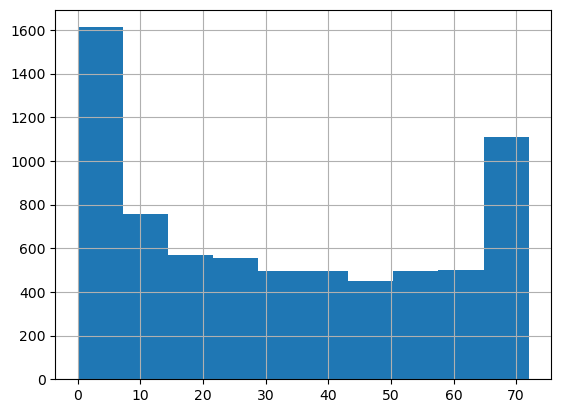

In [10]:
df["tenure"].hist()

In [34]:
# Data imputation

In [43]:
df[df["Churn"].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# Mean
df['Churn'].fillna(value=df['Churn'].mean())

In [ ]:
# Const 
df["Churn"].fillna(value=0) # any const you can fill